In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


In [ ]:
# 1️⃣ Load dataset
df = pd.read_csv("gender_submission.csv")

print("📊 Dataset Preview:")
print(df.head(10))

📊 Dataset Preview:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
5          897         0
6          898         1
7          899         0
8          900         1
9          901         0


🧠 Code 1 — Perceptron from Scratch

In [ ]:

# 2️⃣ Encode non-numeric columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
# 4️⃣ Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5️⃣ Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize weights and bias
weights = np.zeros(X_train.shape[1])
bias = 0
lr = 0.01
epochs = 100

# Step activation function
def step(x):
    return 1 if x >= 0 else 0

In [ ]:
# Training the Perceptron
for epoch in range(epochs):
    for i in range(X_train.shape[0]):
        linear = np.dot(X_train[i], weights) + bias
        pred = step(linear)
        error = y_train.iloc[i] - pred
        weights += lr * error * X_train[i]
        bias += lr * error

In [ ]:
# Testing
y_pred = []
for i in range(X_test.shape[0]):
    linear = np.dot(X_test[i], weights) + bias
    y_pred.append(step(linear))

In [ ]:
# Convert to numpy
y_pred = np.array(y_pred)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {acc*100:.2f}%")


✅ Accuracy: 58.33%


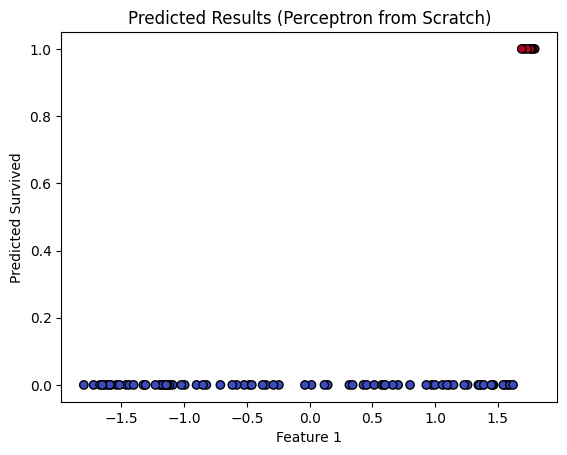

In [ ]:
# ✅ Fixed Visualization
if X_test.shape[1] == 1:
    plt.scatter(X_test[:, 0], y_pred, c=y_pred, cmap='coolwarm', edgecolors='k')
    plt.title("Predicted Results (Perceptron from Scratch)")
    plt.xlabel("Feature 1")
    plt.ylabel("Predicted Survived")
    plt.show()
elif X_test.shape[1] >= 2:
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolors='red')
    plt.title("Predicted Results (Perceptron from Scratch)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
else:
    print("⚠️ Not enough features to visualize.")

Using Scikit Learn


In [ ]:
# ==============================
# Titanic Perceptron with Scikit-Learn
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [ ]:
# 1️⃣ Load dataset
df = pd.read_csv("gender_submission.csv")

# 2️⃣ Encode non-numeric columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# 3️⃣ Fill missing values with column mean
df = df.fillna(df.mean())

# 4️⃣ Define features and target
X = df.drop(columns=['Survived'])
y = df['Survived']

# 5️⃣ Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6️⃣ Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7️⃣ Train Perceptron
clf = Perceptron(max_iter=1000, eta0=0.01, random_state=42)
clf.fit(X_train, y_train)

# 8️⃣ Predict on test set
y_pred = clf.predict(X_test)

# 9️⃣ Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy: {acc*100:.2f}%")

✅ Test Accuracy: 59.52%


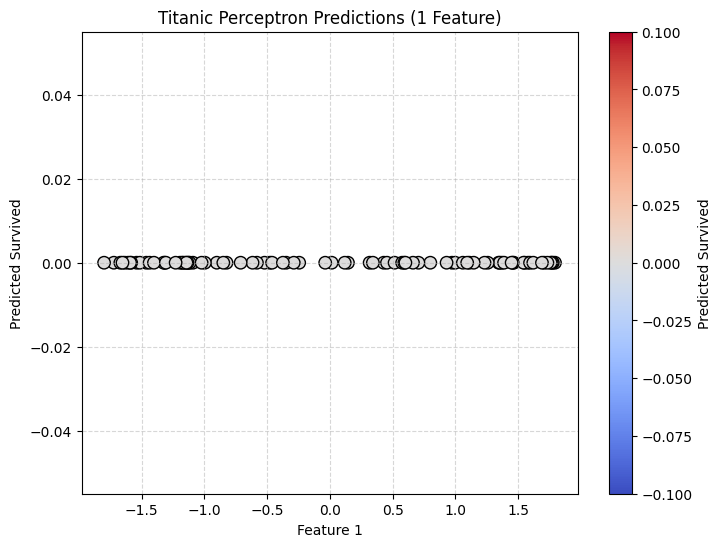

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

n_features = X_test.shape[1]
if n_features >= 2:
    pca = PCA(n_components=2)
    X_test_2d = pca.fit_transform(X_test)

    plt.figure(figsize=(8,6))
    scatter = plt.scatter(
        X_test_2d[:, 0],
        X_test_2d[:, 1],
        c=y_pred,
        cmap='coolwarm',
        edgecolor='k',
        s=80
    )
    plt.title("Titanic Perceptron Predictions (PCA 2D)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(scatter, label="Predicted Survived")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

elif n_features == 1:
    plt.figure(figsize=(8,6))
    plt.scatter(
        X_test[:, 0],
        y_pred,
        c=y_pred,
        cmap='coolwarm',
        edgecolor='k',
        s=80
    )
    plt.title("Titanic Perceptron Predictions (1 Feature)")
    plt.xlabel("Feature 1")
    plt.ylabel("Predicted Survived")
    plt.colorbar(label="Predicted Survived")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

else:
    print("⚠️ Not enough features to visualize.")
